In [33]:
import pandas as pd
import numpy as np

train = pd.read_csv("/content/drive/MyDrive/Analytics Vidhya Hackathons/1_Big Mart Sales/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Analytics Vidhya Hackathons/1_Big Mart Sales/test.csv")
ss = pd.read_csv("/content/drive/MyDrive/Analytics Vidhya Hackathons/1_Big Mart Sales/sample_submission.csv")

train.shape , test.shape , ss.shape

((8523, 12), (5681, 11), (5681, 3))

In [34]:
pd.set_option('display.max_columns', 50)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
for col in train.iloc[:,0:21].columns:
    print(col,':',train[col].nunique(),':',train[col].isna().sum())
    #target_mean(train.col,'click_rate_log')

Item_Identifier : 1559 : 0
Item_Weight : 415 : 1463
Item_Fat_Content : 5 : 0
Item_Visibility : 7880 : 0
Item_Type : 16 : 0
Item_MRP : 5938 : 0
Outlet_Identifier : 10 : 0
Outlet_Establishment_Year : 9 : 0
Outlet_Size : 3 : 2410
Outlet_Location_Type : 3 : 0
Outlet_Type : 4 : 0
Item_Outlet_Sales : 3493 : 0


<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

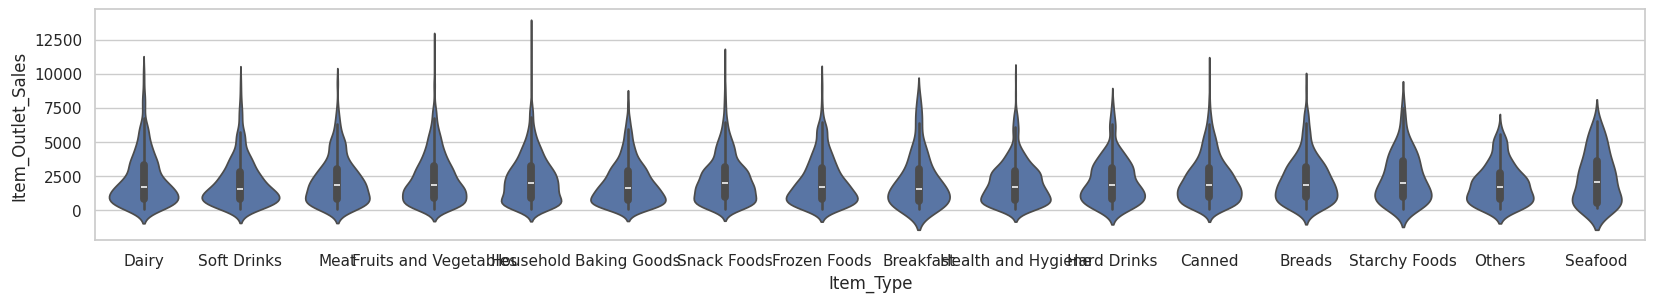

In [39]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 3))

seaborn.violinplot(x ="Item_Type", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

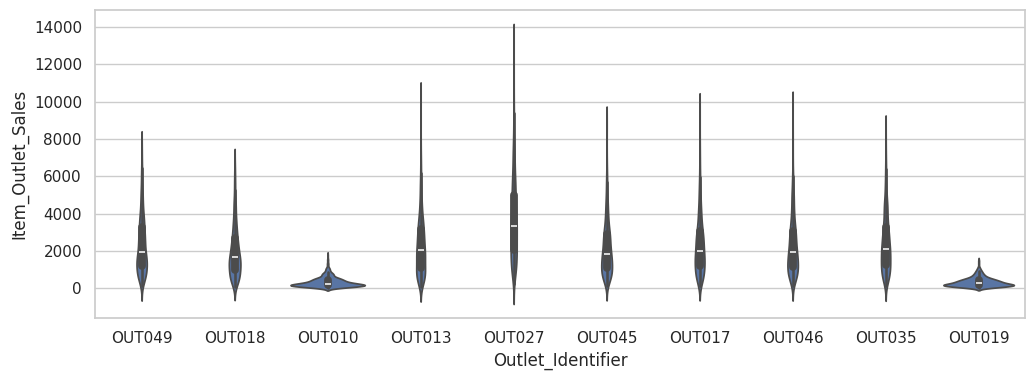

In [41]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Identifier", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

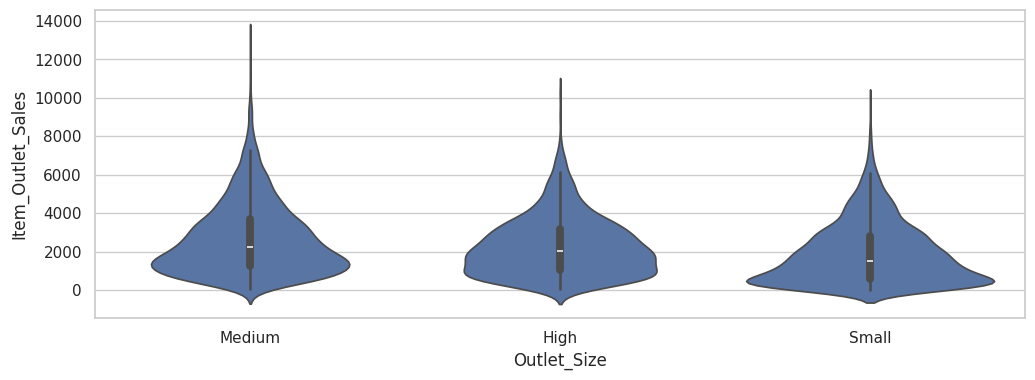

In [42]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Size", y ="Item_Outlet_Sales",data = train)

In [44]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
train['Item_Visibility'] =  np.where(train['Item_Visibility'] == 0,"NaN",train['Item_Visibility']).astype(float)
train['Item_Identifier'] = train['Item_Identifier'].str.slice(0,2)
train['running'] = 2013 - train['Outlet_Establishment_Year']
train['price/wt'] = train['Item_MRP'] /train['Item_Weight']
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT010',"Small",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT017',"Medium",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT045',"Medium",train['Outlet_Size'])
train['Item_MRP2'] =  np.where(train['Item_MRP'] <69,"A",np.where(train['Item_MRP'] <136,"B",np.where(train['Item_MRP'] <203,"C","D")))

In [45]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
test['Item_Visibility'] =  np.where(test['Item_Visibility'] == 0,"NaN",test['Item_Visibility']).astype(float)
test['Item_Identifier'] = test['Item_Identifier'].str.slice(0,2)
test['running'] = 2013 - test['Outlet_Establishment_Year']
test['price/wt'] = test['Item_MRP'] /test['Item_Weight']
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT010',"Small",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT017',"Medium",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT045',"Medium",test['Outlet_Size'])
test['Item_MRP2'] =  np.where(test['Item_MRP'] <69,"A",np.where(test['Item_MRP'] <136,"B",np.where(test['Item_MRP'] <203,"C","D")))

<Axes: >

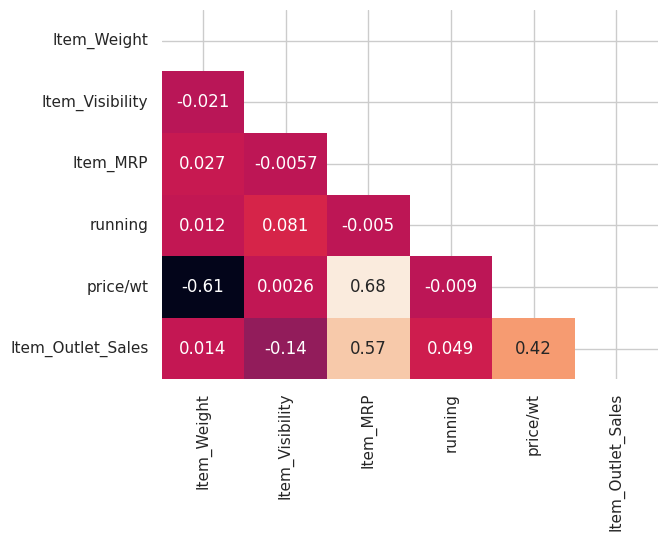

In [46]:
import seaborn as sns
import numpy as np
corr=train[['Item_Weight','Item_Visibility','Item_MRP','running','price/wt','Item_Outlet_Sales']].corr()
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask,cbar=False)

In [47]:
y_train = train['Item_Outlet_Sales']
x_train = train.drop(['Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1)

In [48]:
x_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,running,price/wt,Item_MRP2
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,14,26.861204,D
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,4,8.153581,A
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,14,8.092457,C
3,FD,19.20,1,NaN,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,15,9.484115,C
4,NC,8.93,0,NaN,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,26,6.031512,A


In [50]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [51]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

def objective(trial,data=x_train,target=y_train):

    train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.15,random_state=42)
    param = {
        'loss_function': 'RMSE',
        #'task_type': 'GPU',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        #'rsm': trial.suggest_uniform('rsm', 0.3, 1.0),
        'subsample': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.006, 0.018),
        'n_estimators':  1000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    }
    model = CatBoostRegressor(**param,cat_features=categorical_features)

    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=200,verbose=False)

    preds = model.predict(test_x)

    rmse = mean_squared_error(test_y, preds,squared=False)

    return rmse

In [52]:
# import optuna
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=5)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [53]:
Best_trial = {'l2_leaf_reg': 0.001061926310,'max_bin': 322,
 'learning_rate': 0.01081467174,'max_depth': 5,'random_state': 2020,'min_data_in_leaf': 163,
              'loss_function': 'RMSE','n_estimators':  1000}

In [54]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

model = CatBoostRegressor(**Best_trial,cat_features=categorical_features)
model.fit(x_train, y_train)
test_pred = model.predict(test[x_train.columns])

0:	learn: 1696.5184236	total: 58.9ms	remaining: 58.9s
1:	learn: 1686.3506974	total: 68.3ms	remaining: 34.1s
2:	learn: 1675.8159590	total: 77.1ms	remaining: 25.6s
3:	learn: 1665.8915679	total: 86.4ms	remaining: 21.5s
4:	learn: 1655.9178848	total: 96.5ms	remaining: 19.2s
5:	learn: 1645.9673708	total: 107ms	remaining: 17.7s
6:	learn: 1636.2765968	total: 121ms	remaining: 17.2s
7:	learn: 1626.7296716	total: 140ms	remaining: 17.4s
8:	learn: 1617.1253488	total: 151ms	remaining: 16.6s
9:	learn: 1607.8504955	total: 159ms	remaining: 15.7s
10:	learn: 1598.7102699	total: 170ms	remaining: 15.3s
11:	learn: 1589.6917000	total: 179ms	remaining: 14.7s
12:	learn: 1580.8234830	total: 187ms	remaining: 14.2s
13:	learn: 1571.8891965	total: 196ms	remaining: 13.8s
14:	learn: 1563.1422325	total: 204ms	remaining: 13.4s
15:	learn: 1554.6905142	total: 214ms	remaining: 13.1s
16:	learn: 1546.4380144	total: 223ms	remaining: 12.9s
17:	learn: 1538.2122933	total: 233ms	remaining: 12.7s
18:	learn: 1530.1127447	total: 24

In [55]:
test_pred[test_pred<33]=33
ss['Item_Outlet_Sales'] = test_pred
ss.to_csv('/content/drive/MyDrive/Analytics Vidhya Hackathons/1_Big Mart Sales/submission.csv',index=False)
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1664.490710
1,FDW14,OUT017,1469.949258
2,NCN55,OUT010,603.720284
3,FDQ58,OUT017,2580.981905
4,FDY38,OUT027,6087.051995
